In [163]:
import cvxopt
import matplotlib.pyplot as plt
import numpy as np

In [164]:
input_size = 100
input = np.random.uniform(0, 1, (input_size, 2))

In [165]:
desired = []
class_1 = []
class_dash_1 = []

func_1 = lambda x, y : y < 0.2 * np.sin(10*x) + 0.3
func_2 = lambda x, y : (y - 0.8)**2 + (x - 0.5)**2 < 0.15**2

for point in input:
    if func_1(point[0], point[1]):
        desired.append(1)
        class_1.append(point)
    elif func_2(point[0], point[1]):
        desired.append(1)
        class_1.append(point)
    else:
        desired.append(-1)
        class_dash_1.append(point)
        
desired_matrix = np.array(desired).reshape(-1, 1) * 1.

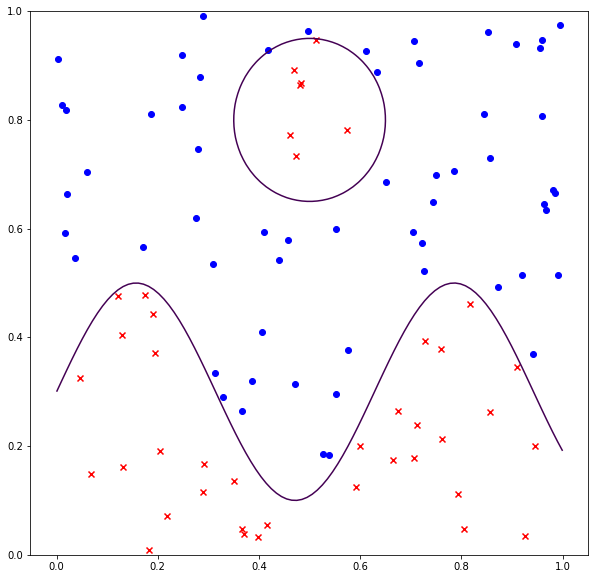

In [166]:
X = np.linspace(-0.0, 1.0, 100)
Y = np.linspace(-0.0, 1.0, 100)

X_matrix, Y_matrix = np.meshgrid(X, Y)
fig, ax = plt.subplots(figsize=(10,10))
plt.scatter(*zip(*class_1), c='r', marker='x')
plt.scatter(*zip(*class_dash_1), c='b', marker='o')

contuor_1 = (Y_matrix - 0.8)**2 + (X_matrix - 0.5)**2 - 0.15**2 
contuor_2 = (-0.2 * np.sin(10* X_matrix)) - 0.3 + Y_matrix
plt.contour(X,Y,contuor_1,[0])
plt.contour(X,Y,contuor_2,[0])

plt.show()

In [168]:
def polynomial_kernel(x, y, degree=5):
    return (1 + np.dot(x, y)) ** degree

def discriminant_function(X, alpha, theta, degree=5):
    value = 0
    for i in range(input_size):
        value += alpha[i] * desired_matrix[i] * polynomial_kernel(input[i], X, degree)
    return value + theta 

In [178]:
def support_vector_machine(degree=5):
    print(f"Polynomial Kernel of Degree {degree}")
    print("-------------------------------------")
    print(f"Number of points to be classified : {input_size}")
    k_values = np.zeros((input_size,input_size)) 
    for i in range(input_size):
        for j in range(input_size):
            k_values[i,j] = polynomial_kernel(input[i], input[j], degree)
            
    P = cvxopt.matrix(np.multiply(np.dot(desired_matrix, desired_matrix.T), k_values))
    q = cvxopt.matrix(np.ones(input_size) * -1.)
    A = cvxopt.matrix(desired_matrix, (1, input_size))
    b = cvxopt.matrix(0.0)
    G = cvxopt.matrix(np.diag(np.ones(input_size) * -1))
    h = cvxopt.matrix(np.zeros(input_size))
    
    #Solve Qudratic problem and fetch Alpha values 
    qp_solution = cvxopt.solvers.qp(P,q,G,h,A,b)
    alpha = np.ravel(qp_solution['x'])

    support_vectors = alpha > 1e-5
    sv_indices = [i for i in range(len(support_vectors)) if support_vectors[i]]
    sv_index = sv_indices[1]
    
    sum = 0
    for i in range(input_size):
        sum += alpha[i] * desired_matrix[i] * k_values[sv_index,i]
        
    theta = np.copy(desired_matrix[sv_index]) - sum

    classified_positive =[]
    classified_negative = []
    sv_positive = []
    sv_negative = []
    
    #Classify Points based on the alpha, theta and kernel values obtained
    for i in range(input_size):
        discriminant_value = discriminant_function(input[i] , alpha, theta, degree)
        
        if discriminant_value <= 0.:
            classified_negative.append(input[i])
            if(i in sv_indices):
                sv_negative.append(input[i])
        elif discriminant_value > 0. :
            classified_positive.append(input[i])
            if(i in sv_indices):
                sv_positive.append(input[i])

    #Print Results
    print(f"Number of support vectors : {len(sv_indices)}")
    print(f"Number of H+ support vectors : {len(sv_positive)}")
    print(f"Number of H- support vectors : {len(sv_negative)}\n")
    print(f"Originally classified as C1 : {len(class_1)}")
    print(f"Originally classified as C-1 : {len(class_dash_1)}\n")
    print(f"SVM modelled classifier classified C1 : {len(classified_positive)}")
    print(f"SVM modelled classifier classified C-1 : {len(classified_negative)}")

    hyperplane = discriminant_function(np.asarray([X_matrix.ravel(), Y_matrix.ravel()]), alpha, theta, degree)
    hyperplane = hyperplane.reshape(contuor_1.shape)
    hyperplane_positive = hyperplane + 1
    hyperplane_negative = hyperplane - 1
    fig, ax = plt.subplots(figsize=(20,20))

    plt.scatter(*zip(*classified_positive), c='r', marker='x', label='Class 1')
    plt.scatter(*zip(*classified_negative), c='b', marker='o', label='Class -1')
    
    contour_3 = plt.contour(X,Y,hyperplane, [0], colors='black')
    contour_4 = plt.contour(X,Y,hyperplane_positive, [0], colors='blue')
    contour_5 = plt.contour(X,Y,hyperplane_negative, [0], colors='red')
    
    ax.clabel(contour_3, [0], inline=True, fmt="H")
    ax.clabel(contour_4, [0], inline=True, fmt="H-")
    ax.clabel(contour_5, [0], inline=True, fmt="H+")
    plt.legend(loc='upper right')
    plt.gca().set_aspect('equal')
    plt.show()

Polynomial Kernel of Degree 4
-------------------------------------
Number of points to be classified : 100
Number of support vectors : 13
Number of H+ support vectors : 5
Number of H- support vectors : 8

Originally classified as C1 : 41
Originally classified as C-1 : 59

SVM modelled classifier classified C1 : 41
SVM modelled classifier classified C-1 : 59


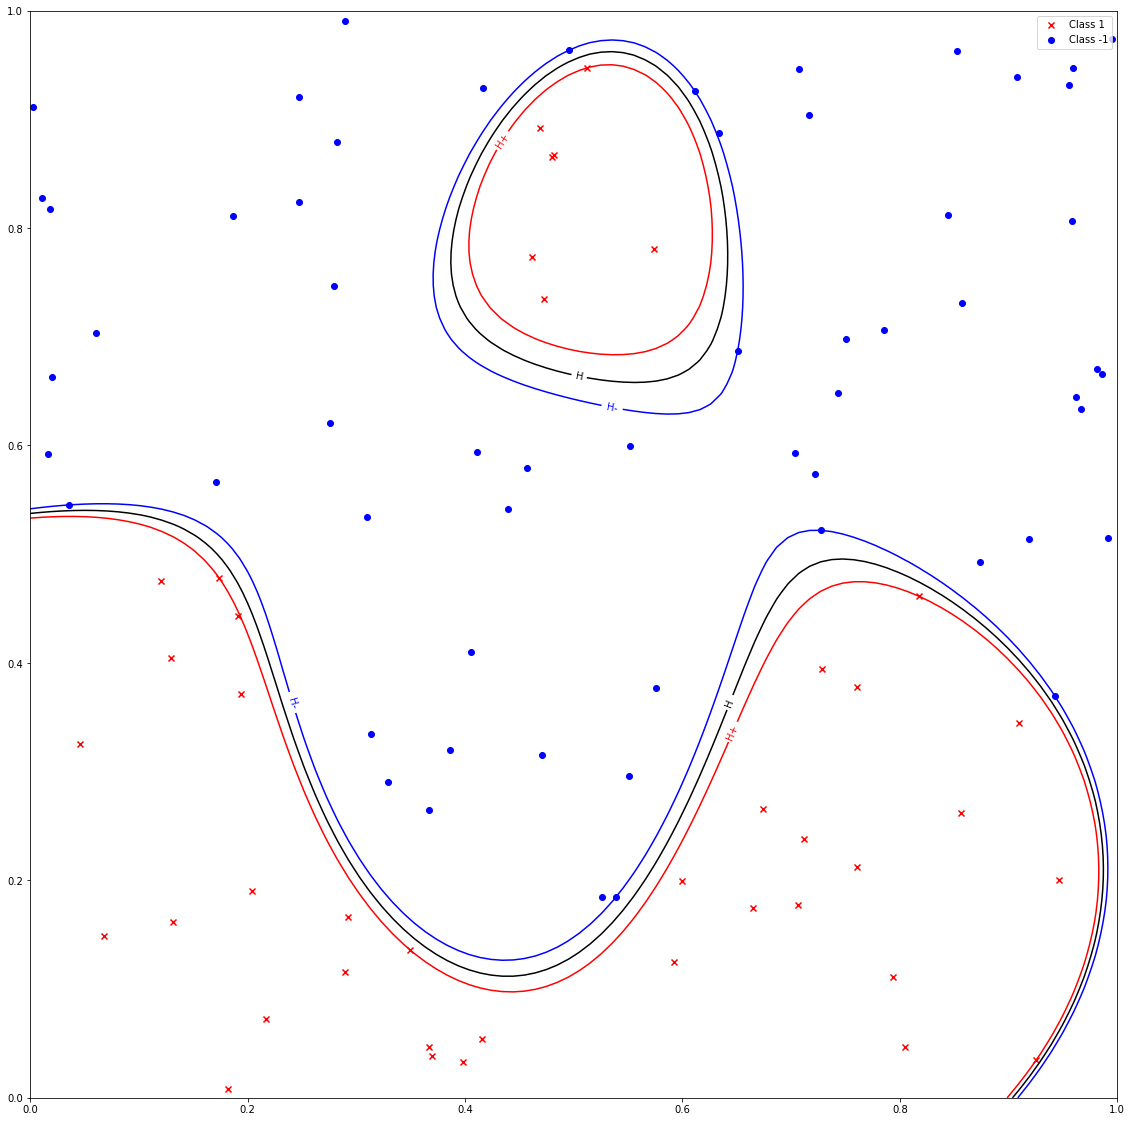

In [179]:
support_vector_machine(degree=4)

### Kernel

- Using a polynomial kernel of degree 4 and above gave a distinct boundary and clearly visible H+ and H1 along with support vectors on the plot.